# 第4章 確率分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

## 4.1 分布関数と密度関数

### 図4.1 見本を昇順にソートした確率変数

In [2]:
Ydata = np.load('Ch03_Ydata500.npy')

In [3]:
Ydata_sorted = np.sort(Ydata)

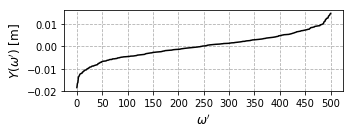

In [4]:
plt.figure(figsize = ( 5 , 1.5 ))
plt.plot(Ydata_sorted,'k-')
plt.xlabel('$\omega\'$', fontsize=12)
plt.ylabel('$Y(\omega\')$ [m]', fontsize=12)
plt.xticks(np.arange(0,501,50))
plt.grid(linestyle='--')
plt.savefig("figs/Ch03-gun_500_Ysort.eps", bbox_inches='tight')

## 4.1.1 分布関数

### 事象 $\{Y \leq y\}$

In [5]:
def Yy(y):
    return np.where(Ydata <= y)[0]

In [6]:
Yy(-0.01)

array([ 19,  46,  53,  72,  82,  93, 133, 137, 147, 162, 201, 263, 264,
       292, 336, 363, 435, 439, 457, 475, 486])

### 累積度数 (cumulative frequency)

In [7]:
def _cf(y):
    return len(Yy(y)) 

cf = np.vectorize(_cf)

In [8]:
cf(-10), cf(-0.01)

(array(0), array(21))

### 分布関数

In [9]:
def F(y):
    return cf(y) / len(Ydata)

In [10]:
F(-0.01)

0.041916167664670656

### 表4.1

In [11]:
ys = np.linspace(-0.02, 0.02, 9)
tab_4_1 = np.array([ys.T, cf(ys).T, F(ys).T]).T 
for line in tab_4_1: 
    print('$%g$\t& $%d$\t& {\\tt %.2e} \\\\' % (line[0],line[1],line[2]))
#    print('%g\t%d\t%g' % (line[0],line[1],line[2]))

$-0.02$	& $0$	& {\tt 0.00e+00} \\
$-0.015$	& $3$	& {\tt 5.99e-03} \\
$-0.01$	& $21$	& {\tt 4.19e-02} \\
$-0.005$	& $85$	& {\tt 1.70e-01} \\
$0$	& $244$	& {\tt 4.87e-01} \\
$0.005$	& $404$	& {\tt 8.06e-01} \\
$0.01$	& $485$	& {\tt 9.68e-01} \\
$0.015$	& $501$	& {\tt 1.00e+00} \\
$0.02$	& $501$	& {\tt 1.00e+00} \\


### 図4.2 確率分布関数

In [12]:
yy = np.arange(-0.02,0.02,4e-5)

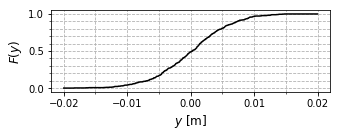

In [13]:
plt.figure(figsize = ( 5 , 1.5 ))

plt.plot(yy, F(yy),'k-')

plt.xlabel('$y$ [m]', fontsize=12)
plt.ylabel('$F(y)$', fontsize=12)
plt.xticks(np.linspace(-0.02,0.02,5))
plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(0.005))
plt.grid(which='minor', linestyle='--')
plt.savefig("figs/Ch03-gun_500_F.eps", bbox_inches='tight')

## 4.1.2 ヒストグラム

In [14]:
ii = np.arange(9)
ii

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### 式(4.4)

In [15]:
yy = np.linspace(-0.02,0.02,9)
yy

array([-0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
        0.02 ])

### 式(4.5)

In [16]:
def A(i):
    return np.where( (yy[i] <= Ydata) & (Ydata < yy[i+1]) )[0]
A(0)

array([147, 292, 457])

In [17]:
def _PA(i):
    return len(A(i))/len(Ydata)

PA = np.vectorize(_PA)

In [18]:
PA(ii[:-2])

array([0.00598802, 0.03592814, 0.12774451, 0.31736527, 0.31936128,
       0.16167665, 0.03193613])

### 図4.3 相対度数ヒストグラム（高さが確率）

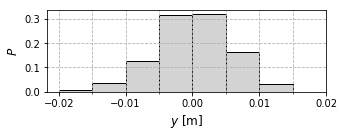

In [19]:
plt.figure(figsize = ( 5 , 1.5 ))

plt.bar(yy[:-2],PA(ii[:-2]),width=yy[1]-yy[0], align='edge',color='lightgray',edgecolor='k')

plt.xlabel('$y$ [m]', fontsize=12)
plt.ylabel('$P$', fontsize=12)
plt.xticks(np.linspace(-0.02,0.02,5))
plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(0.005))
plt.grid(which='minor', linestyle='--')
plt.savefig("figs/Ch03-gun_500_prob.eps", bbox_inches='tight')

## 4.1.3 密度関数

### 図4.4 近似的な確率密度関数（面積が確率）

In [20]:
Δy = yy[1] -yy[0]

def _pA(i):
    return _PA(i)/Δy

pA = np.vectorize(_pA)

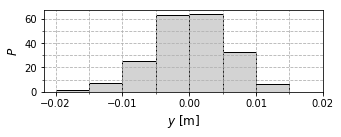

In [21]:
plt.figure(figsize = ( 5 , 1.5 ))

plt.bar(yy[:-2],pA(ii[:-2]),width=yy[1]-yy[0], align='edge',color='lightgray',edgecolor='k')

plt.xlabel('$y$ [m]', fontsize=12)
plt.ylabel('$P$', fontsize=12)
plt.xticks(np.linspace(-0.02,0.02,5))
plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(0.005))
plt.grid(which='minor', linestyle='--')
plt.savefig("figs/Ch03-gun_500_pdf.eps", bbox_inches='tight')

### 図4.3, 4.4 Matplotlib の組み込み関数を利用した例

確率密度関数は，組み込み関数を使うほうが簡単です．

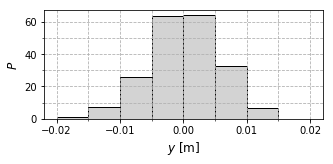

In [22]:
plt.figure(figsize = ( 5 , 2 ))

plt.hist(Ydata, range=[-0.02,0.02], bins=8, density=True, color='lightgray',edgecolor='k')

plt.xlabel('$y$ [m]', fontsize=12)
plt.ylabel('$P$', fontsize=12)
plt.xticks(np.linspace(-0.02,0.02,5))
plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(0.005))
plt.grid(which='minor', linestyle='--')

### 表4.2

In [23]:
for i in ii[:-1]:
    print('%d %f %f %d %f %f' % (i,yy[i],yy[i+1],len(A(i)), PA(i), pA(i) ) )
    #print('$%d$& $%g$& $%g$& $%d$& {\\tt %.2e}& {\\tt %.2e}\\\\' % (i,yy[i],yy[i+1],len(A(i)), PA(i), pA(i) ) )

0 -0.020000 -0.015000 3 0.005988 1.197605
1 -0.015000 -0.010000 18 0.035928 7.185629
2 -0.010000 -0.005000 64 0.127745 25.548902
3 -0.005000 0.000000 159 0.317365 63.473054
4 0.000000 0.005000 160 0.319361 63.872255
5 0.005000 0.010000 81 0.161677 32.335329
6 0.010000 0.015000 16 0.031936 6.387226
7 0.015000 0.020000 0 0.000000 0.000000


## 4.2 代表的な確率分布

In [24]:
def plot_density(x, p, spec='k-', label=None, reset=True):
    if reset is True: plt.figure(figsize = ( 5 , 1.5 ))

    plt.plot(x, p, spec, label=label)

    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$p(x)$', fontsize=12)
    plt.xlim([min(x),max(x)])
    plt.grid(linestyle='--')
    if label is not None: plt.legend()

## 4.2.1 一様分布

$$p(x):=
  \begin{cases}
   \displaystyle
   \frac{1}{b-a}& (a\leq x\leq b)\\
   0 & (\text{otherwise})\\
  \end{cases}$$

In [25]:
def _uniform(x,a,b):
    if a <= x and x <= b:
        return 1.0/(b-a)
    else:
        return 0.0
    
uniform = np.vectorize(_uniform,excluded=['a','b'])

In [26]:
xx = np.linspace(-5,5,200)

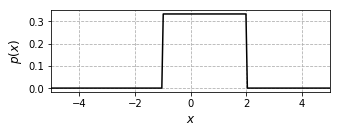

In [27]:
plot_density(xx, uniform(xx,-1,2))
plt.savefig('figs/Ch04_uniform.eps', bbox_inches='tight')

## 4.2.2 ガウス分布(正規分布)

$$p(x) := \frac{1}{\sqrt{2\pi v}}
  \exp\left(-\frac{(x-m)^2}{2 v}\right)$$

In [28]:
def _gauss(x,m,v):
    return 1.0/np.sqrt(2*np.pi*v) * np.exp(-(x-m)**2/(2*v))
    
gauss = np.vectorize(_gauss,excluded=['m','v'])

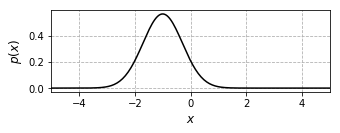

In [29]:
plot_density(xx, gauss(xx,-1,0.5))
plt.savefig('figs/Ch04_gauss.eps', bbox_inches='tight')

## 4.2.3 ラプラス分布

$$ p(x) := \frac{1}{\sqrt{2v}}
  \exp\left(-\sqrt{\frac{2(x-m)^2}{v}}\right)$$

In [30]:
def _laplace(x,m,v):
    return 1.0/np.sqrt(2*v) * np.exp(-np.sqrt(2*(x-m)**2 /v))
    
laplace = np.vectorize(_laplace,excluded=['m','v'])

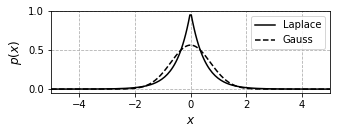

In [31]:
plot_density(xx,laplace(xx,0,0.5), label='Laplace')
plot_density(xx,gauss(xx,0,0.5), spec='k--', label='Gauss', reset=False)
plt.savefig('figs/Ch04_laplace.eps', bbox_inches='tight')

同じグラフを対数プロット

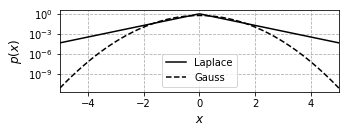

In [32]:
plot_density(xx,laplace(xx,0,0.5), label='Laplace')
plt.yscale("log")
plot_density(xx,gauss(xx,0,0.5), spec='k--', label='Gauss', reset=False)
plt.savefig('figs/Ch04_laplace_log.eps', bbox_inches='tight')

$x=4$ の発生頻度で比較すると，正規分布(gauss)の頻度は 1/100,000,000,000 程度なのに，ラプラス分布(laplace)では 1/10,000 程度の頻度となる．その差は10,000,000倍である．

In [33]:
print(laplace(4,0,0.5))
print(gauss(4,0,0.5))
print(laplace(4,0,0.5)/gauss(4,0,0.5))

0.00033546262790251185
6.349117335933279e-08
5283.610463519667
